In [1]:
#! conda install -y plotly

In [2]:
# Importar bibliotecas

from rasterstats import zonal_stats
import rasterio
from rasterio import plot
from rasterio.plot import show
import os
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import numpy.ma as ma
from osgeo import gdal
import gdal
from gdalconst import *
import glob

In [5]:
# Abrir imagem 
para2004 = ('C:\\Users\\renat\\Documents\\SER347\\Trab_Final\\PARA\\PARA_2004_PARAGOMINAS.tif')
para2008 = ('C:\\Users\\renat\\Documents\\SER347\\Trab_Final\\PARA\\PARA_2008_PARAGOMINAS.tif')
para2010 = ('C:\\Users\\renat\\Documents\\SER347\\Trab_Final\\PARA\\PARA_2010_PARAGOMINAS.tif')
para2012 = ('C:\\Users\\renat\\Documents\\SER347\\Trab_Final\\PARA\\PARA_2012_PARAGOMINAS.tif')
para2014 = ('C:\\Users\\renat\\Documents\\SER347\\Trab_Final\\PARA\\PARA_2014_PARAGOMINAS.tif')

In [6]:
import sys 

try:
    dataset1= gdal.Open(para2004, GA_ReadOnly)
    dataset2=gdal.Open(para2008, GA_ReadOnly)
    dataset3=gdal.Open(para2010, GA_ReadOnly)
    dataset4=gdal.Open(para2012, GA_ReadOnly)
    dataset5=gdal.Open(para2014, GA_ReadOnly)
    print ("Arquivo aberto com sucesso")
except: 
    print ("Erro na abertura do arquivo")

Arquivo aberto com sucesso


In [7]:
#INFORMAÇÕES DAS IMAGENS 
#DIMENSOES DO ARQUIVO 1
linhas=dataset1.RasterYSize
colunas=dataset1.RasterXSize

print("Arquivo 1: numero de linhas", linhas,"numero de colunas", colunas)

print(linhas, colunas)

#QUANTIDADE DE BANDAS
bandas=dataset1.RasterCount
print("numero de bandas:", bandas)


Arquivo 1: numero de linhas 5284 numero de colunas 9160
5284 9160
numero de bandas: 1


In [8]:
# Selecionando apenas uma banda de cada imagem 
 
banda1=dataset1.GetRasterBand(1)
banda2=dataset2.GetRasterBand(1)
banda3=dataset3.GetRasterBand(1)
banda4=dataset4.GetRasterBand(1)
banda5=dataset5.GetRasterBand(1)

In [9]:
# Obtenção dos arrays 
array2004=banda1.ReadAsArray()
array2008=banda2.ReadAsArray()
array2010=banda3.ReadAsArray()
array2012=banda4.ReadAsArray()
array2014=banda5.ReadAsArray()

In [10]:
# Imagem 2004
imagem2004=np.zeros((5284, 9160 ), dtype=np.int16)
for i in range (0, len(array2004)):
    for j in range (0, len(array2004)):
        pixel1=array2004[i][j]
        
        if pixel1==1:
            imagem2004[i][j]=1
        elif pixel1==2:
            imagem2004[i][j]=2
        elif pixel1==3:
            imagem2004[i][j]=4
        elif pixel1==4:
            imagem2004[i][j]=8192
        elif pixel1==5:
            imagem2004[i][j]=8
        elif pixel1==6:
            imagem2004[i][j]=16384
        elif pixel1==7:
            imagem2004[i][j]=512
        elif pixel1==8:
            imagem2004[i][j]=16
        elif pixel1==9:
            imagem2004[i][j]=32768
        elif pixel1==10:
            imagem2004[i][j]=2048
        elif pixel1==11:
            imagem2004[i][j]=4096
        elif pixel1==12:
            imagem2004[i][j]=32
        elif pixel1==13:
            imagem2004[i][j]=64
        elif pixel1==14:
            imagem2004[i][j]=256
        elif pixel1==15:
            imagem2004[i][j]=1024


In [11]:
# Imagem2008
imagem2008=np.zeros((5284, 9160 ), dtype=np.int16)
for i in range (0, len(array2008)):
    for j in range (0, len(array2008)):
        pixel1=array2008[i][j]
        if pixel1==1:
            imagem2008[i][j]=1
        elif pixel1==2:
            imagem2008[i][j]=2
        elif pixel1==3:
            imagem2008[i][j]=32
        elif pixel1==4:
            imagem2008[i][j]=64
        elif pixel1==5:
            imagem2008[i][j]=256
        elif pixel1==6:
            imagem2008[i][j]=1024
        elif pixel1==7:
            imagem2008[i][j]=4
        elif pixel1==8:
            imagem2008[i][j]=512
        elif pixel1==9:
            imagem2008[i][j]=16
        elif pixel1==10:
            imagem2008[i][j]=2048
        elif pixel1==11:
            imagem2008[i][j]=4096
        elif pixel1==12:
            imagem2008[i][j]=8
        elif pixel1==13:
            imagem2008[i][j]=8192
        elif pixel1==14:
            imagem2008[i][j]=16384
        elif pixel1==15:
            imagem2008[i][j]=32768
        

In [12]:
# Imagem2010
imagem2010=np.zeros((5284, 9160), dtype=np.int16)
for i in range (0, len(array2010)):
    for j in range (0, len(array2010)):
        pixel1=array2010[i][j]
        if pixel1==1:
            imagem2010[i][j]=1
        elif pixel1==2:
            imagem2010[i][j]=2
        elif pixel1==3:
            imagem2010[i][j]=16
        elif pixel1==4:
            imagem2010[i][j]=32
        elif pixel1==5:
            imagem2010[i][j]=64
        elif pixel1==6:
            imagem2010[i][j]=256
        elif pixel1==7:
            imagem2010[i][j]=1024
        elif pixel1==8:
            imagem2010[i][j]=128
        elif pixel1==9:
            imagem2010[i][j]=4
        elif pixel1==10:
            imagem2010[i][j]=512
        elif pixel1==11:
            imagem2010[i][j]=2048
        elif pixel1==12:
            imagem2010[i][j]=4096
        elif pixel1==13:
            imagem2010[i][j]=8
        elif pixel1==14:
            imagem2010[i][j]=8192
        elif pixel1==15:
            imagem2010[i][j]=16384
        elif pixel1==16:
            imagem2010[i][j]=32768

In [13]:
# Imagem 2012
imagem2012=np.zeros((5284, 9160), dtype=np.int16)
for i in range (0, len(array2012)):
    for j in range (0, len(array2012)):
        pixel1=array2012[i][j]
        if pixel1==1:
            imagem2012[i][j]=1
        elif pixel1==2:
            imagem2012[i][j]=2
        elif pixel1==3:
            imagem2012[i][j]=4
        elif pixel1==4:
            imagem2012[i][j]=16
        elif pixel1==5:
            imagem2012[i][j]=2048
        elif pixel1==6:
            imagem2012[i][j]=32
        elif pixel1==7:
            imagem2012[i][j]=128
        elif pixel1==8:
            imagem2012[i][j]=256
        elif pixel1==9:
            imagem2012[i][j]=64
        elif pixel1==10:
            imagem2012[i][j]=1024
        elif pixel1==11:
            imagem2012[i][j]=512
        elif pixel1==12:
            imagem2012[i][j]=4096
        elif pixel1==13:
            imagem2012[i][j]=8
        elif pixel1==14:
            imagem2012[i][j]=8192
        elif pixel1==15:
            imagem2012[i][j]=16384
        elif pixel1==16:
            imagem2012[i][j]=32768

In [14]:
# Imagem 2014
imagem2014=np.zeros((5284, 9160 ), dtype=np.int16)
for i in range (0, len(array2014)):
    for j in range (0, len(array2014)):
        pixel1=array2014[i][j]
        if pixel1==1:
            imagem2014[i][j]=1
        elif pixel1==2:
            imagem2014[i][j]=2
        elif pixel1==3:
            imagem2014[i][j]=4
        elif pixel1==4:
            imagem2014[i][j]=8
        elif pixel1==5:
            imagem2014[i][j]=16
        elif pixel1==6:
            imagem2014[i][j]=32
        elif pixel1==7:
            imagem2014[i][j]=64
        elif pixel1==8:
            imagem2014[i][j]=128
        elif pixel1==9:
            imagem2014[i][j]=256
        elif pixel1==10:
            imagem2014[i][j]=512
        elif pixel1==11:
            imagem2014[i][j]=1024
        elif pixel1==12:
            imagem2014[i][j]=2048
        elif pixel1==13:
            imagem2014[i][j]=4096
        elif pixel1==14:
            imagem2014[i][j]=8192
        elif pixel1==15:
            imagem2014[i][j]=16384
        elif pixel1==16:
            imagem2014[i][j]=32768


In [15]:
m04_08=np.zeros((5284,9160), dtype=np.int16)
m08_10=np.zeros((5284,9160), dtype=np.int16)
m10_12=np.zeros((5284,9160), dtype=np.int16)
m12_14=np.zeros((5284,9160), dtype=np.int16)

In [16]:
m04_08=imagem2008-imagem2004
m08_10=imagem2010-imagem2008
m10_12=imagem2012-imagem2010
m12_14=imagem2014-imagem2012

In [17]:
# MUDANÇA 2004 PARA 2008

In [18]:
# Soma_2004-2008

soma=np.where()

#1º Linha (AGRICULTURA ANUAL)
num_0= (m04_08 == 0).sum()
num_1 = (m04_08 ==-1).sum()
num_2 = (m04_08 ==-3).sum()
num_3 = (m04_08 ==-7).sum()
num_4 = (m04_08 ==-15).sum()
num_5 = (m04_08 ==-31).sum()
num_6 = (m04_08 ==-63).sum()
num_7 = (m04_08 ==-127).sum()
num_8 = (m04_08 ==-255).sum()
num_9 = (m04_08 ==-511).sum()
num_10 = (m04_08 ==-1023).sum()
num_11= (m04_08 ==-2047).sum()
num_12= (m04_08 ==-4095).sum()
num_13= (m04_08 ==-8191).sum()
num_14 = (m04_08 ==-16383).sum()
num_15= (m04_08 ==-32767).sum()

#2º Linha (Área Não Observada)
num_16= (m04_08 == 1).sum()
num_17= (m04_08 ==-2).sum()
num_18= (m04_08 ==-6).sum()
num_19 = (m04_08 ==-14).sum()
num_20 = (m04_08 ==-30).sum()
num_21 = (m04_08 ==-62).sum()
num_22 = (m04_08 ==-126).sum()
num_23 = (m04_08 ==-254).sum()
num_24 = (m04_08 ==-510).sum()
num_25 = (m04_08 ==-1022).sum()
num_26 = (m04_08 ==-2046).sum()
num_27 = (m04_08 ==-4094).sum()
num_28 = (m04_08 ==-8190).sum()
num_29 = (m04_08 ==-16382).sum()
num_30 = (m04_08 ==-32766).sum()

#3º Linha (Área Urbana)
num_31= (m04_08 == 3).sum()
num_32= (m04_08 == 2).sum()
num_33= (m04_08 ==-4).sum()
num_34 = (m04_08 ==-12).sum()
num_35 = (m04_08 ==-28).sum()
num_36 = (m04_08 ==-60).sum()
num_37 = (m04_08 ==-124).sum()
num_38 = (m04_08 ==-252).sum()
num_39 = (m04_08 ==-508).sum()
num_40 = (m04_08 ==-1020).sum()
num_41 = (m04_08 ==-2044).sum()
num_42 = (m04_08 ==-4092).sum()
num_43 = (m04_08 ==-8188).sum()
num_44 = (m04_08 ==-16380).sum()
num_45 = (m04_08 ==-32764).sum()

#4º Linha (Floresta)
num_46= (m04_08 == 7).sum()
num_47= (m04_08 == 6).sum()
num_48= (m04_08 == 4).sum()
num_49 = (m04_08 ==-8).sum()
num_50 = (m04_08 ==-24).sum()
num_51 = (m04_08 ==-56).sum()
num_52 = (m04_08 ==-120).sum()
num_53 = (m04_08 ==-248).sum()
num_54 = (m04_08 ==-504).sum()
num_55 = (m04_08 ==-1016).sum()
num_56 = (m04_08 ==-2040).sum()
num_57 = (m04_08 ==-4088).sum()
num_58 = (m04_08 ==-8184).sum()
num_59 = (m04_08 ==-16376).sum()
num_60 = (m04_08 ==-32760).sum()

#5º Linha (Mosaico de Ocupações)
num_61= (m04_08 == 15).sum()
num_62= (m04_08 == 14).sum()
num_63= (m04_08 == 12).sum()
num_64 = (m04_08 == 8).sum()
num_65 = (m04_08 ==-16).sum()
num_66 = (m04_08 ==-48).sum()
num_67 = (m04_08 ==-112).sum()
num_68 = (m04_08 ==-240).sum()
num_69 = (m04_08 ==-496).sum()
num_70 = (m04_08 ==-1008).sum()
num_71 = (m04_08 ==-2032).sum()
num_72 = (m04_08 ==-4080).sum()
num_73 = (m04_08 ==-8176).sum()
num_74 = (m04_08 ==-16368).sum()
num_75 = (m04_08 ==-32752).sum()

#6º Linha (Pasto Limpo)
num_76= (m04_08 == 31).sum()
num_77= (m04_08 == 30).sum()
num_78= (m04_08 == 28).sum()
num_79 = (m04_08 == 24).sum()
num_80 = (m04_08 == 16).sum()
num_81 = (m04_08 ==-32).sum()
num_82 = (m04_08 ==-96).sum()
num_83 = (m04_08 ==-224).sum()
num_84 = (m04_08 ==-480).sum()
num_85 = (m04_08 ==-992).sum()
num_86 = (m04_08 ==-2016).sum()
num_87 = (m04_08 ==-4064).sum()
num_88 = (m04_08 ==-8160).sum()
num_89 = (m04_08 ==-16352).sum()
num_90 = (m04_08 ==-32736).sum()

#7º Linha (Pasto Sujo)
num_91= (m04_08 == 63).sum()
num_92= (m04_08 == 62).sum()
num_93= (m04_08 == 60).sum()
num_94 = (m04_08 == 56).sum()
num_95 = (m04_08 == 48).sum()
num_96 = (m04_08 == 32).sum()
num_97 = (m04_08 ==-64).sum()
num_98 = (m04_08 ==-192).sum()
num_99 = (m04_08 ==-448).sum()
num_100 = (m04_08 ==-960).sum()
num_101 = (m04_08 ==-1984).sum()
num_102 = (m04_08 ==-4032).sum()
num_103 = (m04_08 ==-8128).sum()
num_104 = (m04_08 ==-16320).sum()
num_105 = (m04_08 ==-32704).sum()

#8º Linha (Reflorestamento)
num_106 = (m04_08 ==127).sum()
num_107 = (m04_08 ==126).sum()
num_108 = (m04_08 ==124).sum()
num_109 = (m04_08 ==120).sum()
num_110 = (m04_08 ==112).sum()
num_111 = (m04_08 ==96).sum()
num_112 = (m04_08 ==64).sum()
num_113 = (m04_08 ==-128).sum()
num_114 = (m04_08 ==-384).sum()
num_115 = (m04_08 ==-896).sum()
num_116 = (m04_08 ==-1920).sum()
num_117 = (m04_08 ==-3968).sum()
num_118 = (m04_08 ==-8064).sum()
num_119 = (m04_08 ==-16256).sum()
num_120 = (m04_08 ==-32640).sum()

#9º Linha (Regeneração com Pasto)
num_121 = (m04_08 ==255).sum()
num_122 = (m04_08 ==254).sum()
num_123 = (m04_08 ==252).sum()
num_124 = (m04_08 ==248).sum()
num_125 = (m04_08 ==240).sum()
num_126 = (m04_08 ==224).sum()
num_127 = (m04_08 ==192).sum()
num_128 = (m04_08 ==128).sum()
num_129 = (m04_08 ==-256).sum()
num_130 = (m04_08 ==-768).sum()
num_131 = (m04_08 ==-1792).sum()
num_132 = (m04_08 ==-3840).sum()
num_133 = (m04_08 ==-7936).sum()
num_134 = (m04_08 ==-16128).sum()
num_135 = (m04_08 ==-32512).sum()

#10º Linha (Mineração)
num_136 = (m04_08 == 511).sum()
num_137 = (m04_08 == 510).sum()
num_138 = (m04_08 == 508).sum()
num_139 = (m04_08 == 504).sum()
num_140 = (m04_08 == 496).sum()
num_141 = (m04_08 == 480).sum()
num_142 = (m04_08 == 448).sum()
num_143 = (m04_08 == 384).sum()
num_144 = (m04_08 == 256).sum()
num_145 = (m04_08 ==-512).sum()
num_146 = (m04_08 ==-1536).sum()
num_147 = (m04_08 ==-3584).sum()
num_148 = (m04_08 ==-7680).sum()
num_149 = (m04_08 ==-15872).sum()
num_150 = (m04_08 ==-32256).sum()

#11º Linha (Vegetação Secundária)
num_151 = (m04_08 == 1023).sum()
num_152 = (m04_08 == 1022).sum()
num_153 = (m04_08 == 1020).sum()
num_154 = (m04_08 == 1016).sum()
num_155 = (m04_08 == 1008).sum()
num_156 = (m04_08 == 992).sum()
num_157 = (m04_08 == 960).sum()
num_158 = (m04_08 == 896).sum()
num_159 = (m04_08 == 768).sum()
num_160 = (m04_08 == 512).sum()
num_161 = (m04_08 ==-1024).sum()
num_162 = (m04_08 ==-3072).sum()
num_163 = (m04_08 ==-7168).sum()
num_164 = (m04_08 ==-15360).sum()
num_165 = (m04_08 ==-31744).sum()

#12º Linha (Outros)
num_166 = (m04_08 == 2047).sum()
num_167 = (m04_08 == 2046).sum()
num_168 = (m04_08 == 2044).sum()
num_169 = (m04_08 == 2040).sum()
num_170 = (m04_08 == 2032).sum()
num_171 = (m04_08 == 2016).sum()
num_172 = (m04_08 == 1984).sum()
num_173 = (m04_08 == 1920).sum()
num_174 = (m04_08 == 1792).sum()
num_175 = (m04_08 == 1536).sum()
num_176 = (m04_08 == 1024).sum()
num_177 = (m04_08 ==-2048).sum()
num_178 = (m04_08 ==-6144).sum()
num_179 = (m04_08 ==-14336).sum()
num_180 = (m04_08 ==-30720).sum()

#13 Linha (Pasto com solo exposto)
num_181 = (m04_08 == 4095).sum()
num_182 = (m04_08 == 4094).sum()
num_183 = (m04_08 == 4092).sum()
num_184 = (m04_08 == 4088).sum()
num_185 = (m04_08 == 4080).sum()
num_186 = (m04_08 == 4064).sum()
num_187 = (m04_08 == 4032).sum()
num_188 = (m04_08 == 3968).sum()
num_189 = (m04_08 == 3840).sum()
num_190 = (m04_08 == 3584).sum()
num_191 = (m04_08 == 3072).sum()
num_192 = (m04_08 == 2048).sum()
num_193 = (m04_08 ==-4096).sum()
num_194 = (m04_08 ==-12288).sum()
num_195 = (m04_08 ==-28672).sum()

#14 Linha (Desflorestamento)
num_196 = (m04_08 ==-8191).sum()
num_197 = (m04_08 ==-8190).sum()
num_198 = (m04_08 ==-8188).sum()
num_199 = (m04_08 ==-8184).sum()
num_200 = (m04_08 ==-8176).sum()
num_201 = (m04_08 ==-8160).sum()
num_202 = (m04_08 ==-8128).sum()
num_203 = (m04_08 ==-8064).sum()
num_204 = (m04_08 ==-7936).sum()
num_205 = (m04_08 ==-7680).sum()
num_206 = (m04_08 ==-7168).sum()
num_207 = (m04_08 ==-6144).sum()
num_208 = (m04_08 ==-4096).sum()
num_209 = (m04_08 == 8192).sum()
num_210 = (m04_08 ==24576).sum()

#15 Linha (Hidrografia)
num_211 = (m04_08 == 16383).sum()
num_212 = (m04_08 == 16382).sum()
num_213 = (m04_08 == 16380).sum()
num_214 = (m04_08 == 16376).sum()
num_215 = (m04_08 == 16368).sum()
num_216 = (m04_08 == 16352).sum()
num_217 = (m04_08 == 16320).sum()
num_218 = (m04_08 == 16256).sum()
num_219 = (m04_08 == 16128).sum()
num_220 = (m04_08 == 15872).sum()
num_221 = (m04_08 == 15360).sum()
num_222 = (m04_08 == 14336).sum()
num_223 = (m04_08 == 12288).sum()
num_224 = (m04_08 ==  8192).sum()
num_225 = (m04_08 ==-16384).sum()

#16 Linha (Não Floresta)
num_226 = (m04_08 == 32767).sum()
num_227 = (m04_08 == 32766).sum()
num_228 = (m04_08 == 32764).sum()
num_229 = (m04_08 == 32760).sum()
num_230 = (m04_08 == 32752).sum()
num_231 = (m04_08 == 32736).sum()
num_232 = (m04_08 == 32704).sum()
num_233 = (m04_08 == 32640).sum()
num_234 = (m04_08 == 32512).sum()
num_235 = (m04_08 == 32256).sum()
num_236 = (m04_08 == 31744).sum()
num_237 = (m04_08 == 30720).sum()
num_238 = (m04_08 == 28672).sum()
num_239 = (m04_08 == 24576).sum()
num_240 = (m04_08 == 16384).sum()

(array([   0,    0,    0, ..., 5283, 5283, 5283], dtype=int64),
 array([   0,    1,    2, ..., 9157, 9158, 9159], dtype=int64))

In [19]:
#Contando os píxeis originas 

cont0_04= (imagem2004 == 1).sum()
cont0_08= (imagem2008 == 1).sum()
cont1_04= (imagem2004 == 2).sum()
cont1_08= (imagem2008 == 2).sum()
cont2_04= (imagem2004 == 4).sum()
cont2_08= (imagem2008 == 4).sum()
cont3_04= (imagem2004 == 8).sum()
cont3_08= (imagem2008 == 8).sum()
cont4_04= (imagem2004 == 16).sum()
cont4_08= (imagem2008 == 16).sum()
cont5_04= (imagem2004 == 32).sum()
cont5_08= (imagem2008 == 32).sum()
cont6_04= (imagem2004 == 64).sum()
cont6_08= (imagem2008 == 64).sum()
cont7_04= (imagem2004 == 128).sum()
cont7_08= (imagem2008 == 128).sum()
cont8_04= (imagem2004 == 256).sum()
cont8_08= (imagem2008 == 256).sum()
cont9_04= (imagem2004 == 512).sum()
cont9_08= (imagem2008 == 512).sum()
cont10_04= (imagem2004 == 1024).sum()
cont10_08= (imagem2008 == 1024).sum()
cont11_04= (imagem2004 == 2048).sum()
cont11_08= (imagem2008 == 2048).sum()
cont12_04= (imagem2004 == 4096).sum()
cont12_08= (imagem2008 == 4096).sum()
cont13_04= (imagem2004 == 8192).sum()
cont13_08= (imagem2008 == 8192).sum()
cont14_04= (imagem2004 == 16384).sum()
cont14_08= (imagem2008 == 16384).sum()
cont15_04= (imagem2004 == 32768).sum()
cont15_08= (imagem2008 == 32768).sum()

In [20]:
#Somando os números de cada classe
SOMA1= num_1 + num_2 + num_3 + num_4 + num_5 + num_6 + num_7 + num_8 + num_9 + num_10 + num_11 + num_12 + num_13 + num_14 + num_15
SOMA2=num_16+num_17+num_18+num_19+num_20+num_21+num_22+num_23+num_24+num_25+num_26+num_27+num_28+num_29+num_30
SOMA3=num_31+num_32+num_33+num_34+num_35+num_36+num_37+num_38+num_39+num_40+num_41+num_42+num_43+num_44+num_45
SOMA4=num_46+num_47+num_48+num_49+num_50+num_51+num_52+num_53+num_54+num_55+num_56+num_57+num_58+num_59+num_60
SOMA5=num_61+num_62+num_63+num_64+num_65+num_66+num_67+num_68+num_69+num_70+num_71+num_72+num_73+num_74+num_75
SOMA6=num_76+num_77+num_78+num_79+num_80+num_81+num_82+num_83+num_84+num_85+num_86+num_87+num_88+num_89+num_90
SOMA7=num_91+num_92+num_93+num_94+num_95+num_96+num_97+num_98+num_99+num_100+num_101+num_102+num_103+num_104+num_105
SOMA8=num_106+num_107+num_108+num_109+num_110+num_111+num_112+num_113+num_114+num_115+num_116+num_117+num_118+num_119+num_120
SOMA9=num_121+num_122+num_123+num_124+num_125+num_126+num_127+num_128+num_129+num_130+num_131+num_132+num_133+num_134+num_135
SOMA10=num_136+num_137+num_138+num_139+num_140+num_141+num_142+num_143+num_144+num_145+num_146+num_147+num_148+num_149+num_150
SOMA11=num_151+num_152+num_153+num_154+num_155+num_156+num_157+num_158+num_159+num_160+num_161+num_162+num_163+num_164+num_165
SOMA12=num_166+num_167+num_168+num_169+num_170+num_171+num_172+num_173+num_174+num_175+num_176+num_177+num_178+num_179+num_180
SOMA13=num_181+num_182+num_183+num_184+num_185+num_186+num_187+num_188+num_189+num_190+num_191+num_192+num_193+num_194+num_195
SOMA14=num_196+num_197+num_198+num_199+num_200+num_201+num_202+num_203+num_204+num_205+num_206+num_207+num_208+num_209+num_210
SOMA15=num_211+num_212+num_213+num_214+num_215+num_216+num_217+num_218+num_219+ num_220+num_221+num_222+num_223+num_224+num_225
SOMA16=num_226+num_227+num_228+num_229+ num_230+num_231+num_232+num_233+num_234+num_235+num_236+num_237+num_238+num_239+ num_240

In [21]:
agranual=cont0_04 - SOMA1
nobs=cont1_04-SOMA2
urbano=cont2_04-SOMA3
floresta=cont3_04-SOMA4
ocupa=cont4_04-SOMA5
pastolimpo=cont5_04-SOMA6
pastosujo=cont6_04-SOMA7
reflor=cont7_04-SOMA8
regen=cont8_04-SOMA9
miner=cont9_04-SOMA10
vegsec=cont10_04-SOMA11
outros=cont11_04-SOMA12
soloexp=cont12_04-SOMA13
desflo=cont13_04-SOMA14
hidro=cont14_04-SOMA15
naoflo=cont14_04-SOMA16

In [22]:
import plotly.plotly as py
import plotly 
import plotly.offline as py 
import plotly.graph_objs as go 
py.init_notebook_mode(connected=True)

In [23]:
numeros0408 = (agranual,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,            
               num_16,nobs, num_17,num_18,num_19,num_20,num_21,num_22,num_23,num_24,num_25,num_26,num_27,num_28,num_29,num_30,
           num_31,num_32,urbano,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,num_42,num_43,num_44,num_45,            
               num_46,num_47,num_48,floresta,num_49,num_50,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60,
           num_61,num_62,num_63,num_64,ocupa,num_65,num_66,num_67,num_68,num_69,num_70,num_71,num_72,num_73,num_74,num_75,            
               num_76,num_77,num_78,num_79,num_80,pastolimpo,num_81,num_82,num_83,num_84,num_85,num_86,num_87,num_88,num_89,num_90,
           num_91,num_92,num_93,num_94,num_95,num_96,pastosujo,num_97,num_98,num_99,num_100,num_101,num_102,num_103,num_104,num_105,          
               num_106,num_107,num_108,num_109,num_110,num_111,num_112,reflor,num_113,num_114,num_115,num_116,num_117,num_118,num_119,num_120,
           num_121,num_122,num_123,num_124,num_125,num_126,num_127,num_128,regen,num_129,num_130,num_131,num_132,num_133,num_134,num_135,
           num_136,num_137,num_138,num_139,num_140,num_141,num_142,num_143,num_144,miner, num_145,num_146,num_147,num_148,num_149,
           num_150,num_151,num_152,num_153,num_154,num_155,
           num_156,num_157,num_158,num_159,num_160,vegsec, num_161,num_162,num_163,num_164,num_165,num_166,num_167,num_168,num_169,num_170,
           num_171,num_172,num_173,num_174,num_175,num_176,outros,num_177,num_178,num_179,num_180,num_181,num_182,num_183,num_184,num_185,
           num_186,num_187,num_188,num_189,num_190,num_191,num_192,soloexp,num_193,num_194,num_195,num_196,num_197,num_198,num_199,
           num_200,num_201,num_202,num_203,num_204,num_205,
           num_206,num_207,num_208,desflo, num_209,num_210,num_211,num_212,num_213,num_214,num_215,
           num_216,num_217,num_218,num_219, num_220,num_221,num_222,num_223,num_224,hidro,num_225,
           num_226,num_227,num_228,num_229, num_230,num_231,num_232,num_233,num_234,num_235,
           num_236,num_237,num_238,num_239, num_240,naoflo
          )

In [24]:
source0408=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15)


In [25]:
target0408=(16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            
)

In [111]:
# SANKEY_2004_2008

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ['Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
               'Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta'],
      color = ["orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink"]
    ),
    link = dict(
      source = source0408,
      target = target0408,
      value = numeros0408
  ))

layout =  dict(
    title = "Diagrama Sankey Ano 2004 para 2008",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

plt.savefig('Sankey_2004_2008.jpg', format= 'pdf')

<Figure size 432x288 with 0 Axes>

In [27]:
#MUDANÇA 2008 PARA 2010

In [28]:
#soma_2008_2010
#1º Linha (AGRICULTURA ANUAL)
num_0= (m08_10 == 0).sum()
num_1 = (m08_10 ==-1).sum()
num_2 = (m08_10 ==-3).sum()
num_3 = (m08_10 ==-7).sum()
num_4 = (m08_10 ==-15).sum()
num_5 = (m08_10 ==-31).sum()
num_6 = (m08_10 ==-63).sum()
num_7 = (m08_10 ==-127).sum()
num_8 = (m08_10 ==-255).sum()
num_9 = (m08_10 ==-511).sum()
num_10 = (m08_10 ==-1023).sum()
num_11= (m08_10 ==-2047).sum()
num_12= (m08_10 ==-4095).sum()
num_13= (m08_10 ==-8191).sum()
num_14 = (m08_10 ==-16383).sum()
num_15= (m08_10 ==-32767).sum()

#2º Linha (Área Não Observada)
num_16= (m08_10 == 1).sum()
num_17= (m08_10 ==-2).sum()
num_18= (m08_10 ==-6).sum()
num_19 = (m08_10 ==-14).sum()
num_20 = (m08_10 ==-30).sum()
num_21 = (m08_10 ==-62).sum()
num_22 = (m08_10 ==-126).sum()
num_23 = (m08_10 ==-254).sum()
num_24 = (m08_10 ==-510).sum()
num_25 = (m08_10 ==-1022).sum()
num_26 = (m08_10 ==-2046).sum()
num_27 = (m08_10 ==-4094).sum()
num_28 = (m08_10 ==-8190).sum()
num_29 = (m08_10 ==-16382).sum()
num_30 = (m08_10 ==-32766).sum()

#3º Linha (Área Urbana)
num_31= (m08_10 == 3).sum()
num_32= (m08_10 == 2).sum()
num_33= (m08_10 ==-4).sum()
num_34 = (m08_10 ==-12).sum()
num_35 = (m08_10 ==-28).sum()
num_36 = (m08_10 ==-60).sum()
num_37 = (m08_10 ==-124).sum()
num_38 = (m08_10 ==-252).sum()
num_39 = (m08_10 ==-508).sum()
num_40 = (m08_10 ==-1020).sum()
num_41 = (m08_10 ==-2044).sum()
num_42 = (m08_10 ==-4092).sum()
num_43 = (m08_10 ==-8188).sum()
num_44 = (m08_10 ==-16380).sum()
num_45 = (m08_10 ==-32764).sum()

#4º Linha (Floresta)
num_46= (m08_10 == 7).sum()
num_47= (m08_10 == 6).sum()
num_48= (m08_10 == 4).sum()
num_49 = (m08_10 ==-8).sum()
num_50 = (m08_10 ==-24).sum()
num_51 = (m08_10 ==-56).sum()
num_52 = (m08_10 ==-120).sum()
num_53 = (m08_10 ==-248).sum()
num_54 = (m08_10 ==-504).sum()
num_55 = (m08_10 ==-1016).sum()
num_56 = (m08_10 ==-2040).sum()
num_57 = (m08_10 ==-4088).sum()
num_58 = (m08_10 ==-8184).sum()
num_59 = (m08_10 ==-16376).sum()
num_60 = (m08_10 ==-32760).sum()

#5º Linha (Mosaico de Ocupações)
num_61= (m08_10 == 15).sum()
num_62= (m08_10 == 14).sum()
num_63= (m08_10 == 12).sum()
num_64 = (m08_10 == 8).sum()
num_65 = (m08_10 ==-16).sum()
num_66 = (m08_10 ==-48).sum()
num_67 = (m08_10 ==-112).sum()
num_68 = (m08_10 ==-240).sum()
num_69 = (m08_10 ==-496).sum()
num_70 = (m08_10 ==-1008).sum()
num_71 = (m08_10 ==-2032).sum()
num_72 = (m08_10 ==-4080).sum()
num_73 = (m08_10 ==-8176).sum()
num_74 = (m08_10 ==-16368).sum()
num_75 = (m08_10 ==-32752).sum()

#6º Linha (Pasto Limpo)
num_76= (m08_10 == 31).sum()
num_77= (m08_10 == 30).sum()
num_78= (m08_10 == 28).sum()
num_79 = (m08_10 == 24).sum()
num_80 = (m08_10 == 16).sum()
num_81 = (m08_10 ==-32).sum()
num_82 = (m08_10 ==-96).sum()
num_83 = (m08_10 ==-224).sum()
num_84 = (m08_10 ==-480).sum()
num_85 = (m08_10 ==-992).sum()
num_86 = (m08_10 ==-2016).sum()
num_87 = (m08_10 ==-4064).sum()
num_88 = (m08_10 ==-8160).sum()
num_89 = (m08_10 ==-16352).sum()
num_90 = (m08_10 ==-32736).sum()

#7º Linha (Pasto Sujo)
num_91= (m08_10 == 63).sum()
num_92= (m08_10 == 62).sum()
num_93= (m08_10 == 60).sum()
num_94 = (m08_10 == 56).sum()
num_95 = (m08_10 == 48).sum()
num_96 = (m08_10 == 32).sum()
num_97 = (m08_10 ==-64).sum()
num_98 = (m08_10 ==-192).sum()
num_99 = (m08_10 ==-448).sum()
num_100 = (m08_10 ==-960).sum()
num_101 = (m08_10 ==-1984).sum()
num_102 = (m08_10 ==-4032).sum()
num_103 = (m08_10 ==-8128).sum()
num_104 = (m08_10 ==-16320).sum()
num_105 = (m08_10 ==-32704).sum()

#8º Linha (Reflorestamento)
num_106 = (m08_10 ==127).sum()
num_107 = (m08_10 ==126).sum()
num_108 = (m08_10 ==124).sum()
num_109 = (m08_10 ==120).sum()
num_110 = (m08_10 ==112).sum()
num_111 = (m08_10 ==96).sum()
num_112 = (m08_10 ==64).sum()
num_113 = (m08_10 ==-128).sum()
num_114 = (m08_10 ==-384).sum()
num_115 = (m08_10 ==-896).sum()
num_116 = (m08_10 ==-1920).sum()
num_117 = (m08_10 ==-3968).sum()
num_118 = (m08_10 ==-8064).sum()
num_119 = (m08_10 ==-16256).sum()
num_120 = (m08_10 ==-32640).sum()

#9º Linha (Regeneração com Pasto)
num_121 = (m08_10 ==255).sum()
num_122 = (m08_10 ==254).sum()
num_123 = (m08_10 ==252).sum()
num_124 = (m08_10 ==248).sum()
num_125 = (m08_10 ==240).sum()
num_126 = (m08_10 ==224).sum()
num_127 = (m08_10 ==192).sum()
num_128 = (m08_10 ==128).sum()
num_129 = (m08_10 ==-256).sum()
num_130 = (m08_10 ==-768).sum()
num_131 = (m08_10 ==-1792).sum()
num_132 = (m08_10 ==-3840).sum()
num_133 = (m08_10 ==-7936).sum()
num_134 = (m08_10 ==-16128).sum()
num_135 = (m08_10 ==-32512).sum()

#10º Linha (Mineração)
num_136 = (m08_10 == 511).sum()
num_137 = (m08_10 == 510).sum()
num_138 = (m08_10 == 508).sum()
num_139 = (m08_10 == 504).sum()
num_140 = (m08_10 == 496).sum()
num_141 = (m08_10 == 480).sum()
num_142 = (m08_10 == 448).sum()
num_143 = (m08_10 == 384).sum()
num_144 = (m08_10 == 256).sum()
num_145 = (m08_10 ==-512).sum()
num_146 = (m08_10 ==-1536).sum()
num_147 = (m08_10 ==-3584).sum()
num_148 = (m08_10 ==-7680).sum()
num_149 = (m08_10 ==-15872).sum()
num_150 = (m08_10 ==-32256).sum()

#11º Linha (Vegetação Secundária)
num_151 = (m08_10 == 1023).sum()
num_152 = (m08_10 == 1022).sum()
num_153 = (m08_10 == 1020).sum()
num_154 = (m08_10 == 1016).sum()
num_155 = (m08_10 == 1008).sum()
num_156 = (m08_10 == 992).sum()
num_157 = (m08_10 == 960).sum()
num_158 = (m08_10 == 896).sum()
num_159 = (m08_10 == 768).sum()
num_160 = (m08_10 == 512).sum()
num_161 = (m08_10 ==-1024).sum()
num_162 = (m08_10 ==-3072).sum()
num_163 = (m08_10 ==-7168).sum()
num_164 = (m08_10 ==-15360).sum()
num_165 = (m08_10 ==-31744).sum()

#12º Linha (Outros)
num_166 = (m08_10 == 2047).sum()
num_167 = (m08_10 == 2046).sum()
num_168 = (m08_10 == 2044).sum()
num_169 = (m08_10 == 2040).sum()
num_170 = (m08_10 == 2032).sum()
num_171 = (m08_10 == 2016).sum()
num_172 = (m08_10 == 1984).sum()
num_173 = (m08_10 == 1920).sum()
num_174 = (m08_10 == 1792).sum()
num_175 = (m08_10 == 1536).sum()
num_176 = (m08_10 == 1024).sum()
num_177 = (m08_10 ==-2048).sum()
num_178 = (m08_10 ==-6144).sum()
num_179 = (m08_10 ==-14336).sum()
num_180 = (m08_10 ==-30720).sum()

#13 Linha (Pasto com solo exposto)
num_181 = (m08_10 == 4095).sum()
num_182 = (m08_10 == 4094).sum()
num_183 = (m08_10 == 4092).sum()
num_184 = (m08_10 == 4088).sum()
num_185 = (m08_10 == 4080).sum()
num_186 = (m08_10 == 4064).sum()
num_187 = (m08_10 == 4032).sum()
num_188 = (m08_10 == 3968).sum()
num_189 = (m08_10 == 3840).sum()
num_190 = (m08_10 == 3584).sum()
num_191 = (m08_10 == 3072).sum()
num_192 = (m08_10 == 2048).sum()
num_193 = (m08_10 ==-4096).sum()
num_194 = (m08_10 ==-12288).sum()
num_195 = (m08_10 ==-28672).sum()

#14 Linha (Desflorestamento)
num_196 = (m08_10 ==-8191).sum()
num_197 = (m08_10 ==-8190).sum()
num_198 = (m08_10 ==-8188).sum()
num_199 = (m08_10 ==-8184).sum()
num_200 = (m08_10 ==-8176).sum()
num_201 = (m08_10 ==-8160).sum()
num_202 = (m08_10 ==-8128).sum()
num_203 = (m08_10 ==-8064).sum()
num_204 = (m08_10 ==-7936).sum()
num_205 = (m08_10 ==-7680).sum()
num_206 = (m08_10 ==-7168).sum()
num_207 = (m08_10 ==-6144).sum()
num_208 = (m08_10 ==-4096).sum()
num_209 = (m08_10 == 8192).sum()
num_210 = (m08_10 ==24576).sum()

#15 Linha (Hidrografia)
num_211 = (m08_10 == 16383).sum()
num_212 = (m08_10 == 16382).sum()
num_213 = (m08_10 == 16380).sum()
num_214 = (m08_10 == 16376).sum()
num_215 = (m08_10 == 16368).sum()
num_216 = (m08_10 == 16352).sum()
num_217 = (m08_10 == 16320).sum()
num_218 = (m08_10 == 16256).sum()
num_219 = (m08_10 == 16128).sum()
num_220 = (m08_10 == 15872).sum()
num_221 = (m08_10 == 15360).sum()
num_222 = (m08_10 == 14336).sum()
num_223 = (m08_10 == 12288).sum()
num_224 = (m08_10 ==  8192).sum()
num_225 = (m08_10 ==-16384).sum()

#16 Linha (Não Floresta)
num_226 = (m08_10 == 32767).sum()
num_227 = (m08_10 == 32766).sum()
num_228 = (m08_10 == 32764).sum()
num_229 = (m08_10 == 32760).sum()
num_230 = (m08_10 == 32752).sum()
num_231 = (m08_10 == 32736).sum()
num_232 = (m08_10 == 32704).sum()
num_233 = (m08_10 == 32640).sum()
num_234 = (m08_10 == 32512).sum()
num_235 = (m08_10 == 32256).sum()
num_236 = (m08_10 == 31744).sum()
num_237 = (m08_10 == 30720).sum()
num_238 = (m08_10 == 28672).sum()
num_239 = (m08_10 == 24576).sum()
num_240 = (m08_10 == 16384).sum()


In [29]:
#CONTANTO OS PIXELS ORGINAIS


cont0_08= (imagem2008 == 1).sum()
cont0_10= (imagem2010 == 1).sum()
cont1_08= (imagem2008 == 2).sum()
cont1_10= (imagem2010 == 2).sum()
cont2_08= (imagem2008 == 4).sum()
cont2_10= (imagem2010 == 4).sum()
cont3_08= (imagem2008 == 8).sum()
cont3_10= (imagem2010 == 8).sum()
cont4_08= (imagem2008 == 16).sum()
cont4_10= (imagem2010 == 16).sum()
cont5_08= (imagem2008 == 32).sum()
cont5_10= (imagem2010 == 32).sum()
cont6_08= (imagem2008 == 64).sum()
cont6_10= (imagem2010 == 64).sum()
cont7_08= (imagem2008 == 128).sum()
cont7_10= (imagem2010 == 128).sum()
cont8_08= (imagem2008 == 256).sum()
cont8_10= (imagem2010 == 256).sum()
cont9_08= (imagem2008 == 512).sum()
cont9_10= (imagem2010 == 512).sum()
cont10_08= (imagem2008 == 1024).sum()
cont10_10= (imagem2010 == 1024).sum()
cont11_08= (imagem2008 == 2048).sum()
cont11_10= (imagem2010 == 2048).sum()
cont12_08= (imagem2008 == 4096).sum()
cont12_10= (imagem2010 == 4096).sum()
cont13_08= (imagem2008 == 8192).sum()
cont13_10= (imagem2010 == 8192).sum()
cont14_08= (imagem2008 == 16384).sum()
cont14_10= (imagem2010 == 16384).sum()
cont15_08= (imagem2008 == 32768).sum()
cont15_10= (imagem2010 == 32768).sum()


In [30]:
#Somando os números de cada classe
SOMA1= num_1 + num_2 + num_3 + num_4 + num_5 + num_6 + num_7 + num_8 + num_9 + num_10 + num_11 + num_12 + num_13 + num_14 + num_15
SOMA2=num_16+num_17+num_18+num_19+num_20+num_21+num_22+num_23+num_24+num_25+num_26+num_27+num_28+num_29+num_30
SOMA3=num_31+num_32+num_33+num_34+num_35+num_36+num_37+num_38+num_39+num_40+num_41+num_42+num_43+num_44+num_45
SOMA4=num_46+num_47+num_48+num_49+num_50+num_51+num_52+num_53+num_54+num_55+num_56+num_57+num_58+num_59+num_60
SOMA5=num_61+num_62+num_63+num_64+num_65+num_66+num_67+num_68+num_69+num_70+num_71+num_72+num_73+num_74+num_75
SOMA6=num_76+num_77+num_78+num_79+num_80+num_81+num_82+num_83+num_84+num_85+num_86+num_87+num_88+num_89+num_90
SOMA7=num_91+num_92+num_93+num_94+num_95+num_96+num_97+num_98+num_99+num_100+num_101+num_102+num_103+num_104+num_105
SOMA8=num_106+num_107+num_108+num_109+num_110+num_111+num_112+num_113+num_114+num_115+num_116+num_117+num_118+num_119+num_120
SOMA9=num_121+num_122+num_123+num_124+num_125+num_126+num_127+num_128+num_129+num_130+num_131+num_132+num_133+num_134+num_135
SOMA10=num_136+num_137+num_138+num_139+num_140+num_141+num_142+num_143+num_144+num_145+num_146+num_147+num_148+num_149+num_150
SOMA11=num_151+num_152+num_153+num_154+num_155+num_156+num_157+num_158+num_159+num_160+num_161+num_162+num_163+num_164+num_165
SOMA12=num_166+num_167+num_168+num_169+num_170+num_171+num_172+num_173+num_174+num_175+num_176+num_177+num_178+num_179+num_180
SOMA13=num_181+num_182+num_183+num_184+num_185+num_186+num_187+num_188+num_189+num_190+num_191+num_192+num_193+num_194+num_195
SOMA14=num_196+num_197+num_198+num_199+num_200+num_201+num_202+num_203+num_204+num_205+num_206+num_207+num_208+num_209+num_210
SOMA15=num_211+num_212+num_213+num_214+num_215+num_216+num_217+num_218+num_219+ num_220+num_221+num_222+num_223+num_224+num_225
SOMA16=num_226+num_227+num_228+num_229+ num_230+num_231+num_232+num_233+num_234+num_235+num_236+num_237+num_238+num_239+ num_240

In [31]:
#NUMERO DE NÃO MUDANÇAS

agranual=cont0_08 - SOMA1
nobs=cont1_08-SOMA2
urbano=cont2_08-SOMA3
floresta=cont3_08-SOMA4
ocupa=cont4_08-SOMA5
pastolimpo=cont5_08-SOMA6
pastosujo=cont6_08-SOMA7
reflor=cont7_08-SOMA8
regen=cont8_08-SOMA9
miner=cont9_08-SOMA10
vegsec=cont10_08-SOMA11
outros=cont11_08-SOMA12
soloexp=cont12_08-SOMA13
desflo=cont13_08-SOMA14
hidro=cont14_08-SOMA15
naoflo=cont14_08-SOMA16


In [32]:
numeros0810 = (agranual,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,            
               num_16,nobs, num_17,num_18,num_19,num_20,num_21,num_22,num_23,num_24,num_25,num_26,num_27,num_28,num_29,num_30,
           num_31,num_32,urbano,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,num_42,num_43,num_44,num_45,            
               num_46,num_47,num_48,floresta,num_49,num_50,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60,
           num_61,num_62,num_63,num_64,ocupa,num_65,num_66,num_67,num_68,num_69,num_70,num_71,num_72,num_73,num_74,num_75,            
               num_76,num_77,num_78,num_79,num_80,pastolimpo,num_81,num_82,num_83,num_84,num_85,num_86,num_87,num_88,num_89,num_90,
           num_91,num_92,num_93,num_94,num_95,num_96,pastosujo,num_97,num_98,num_99,num_100,num_101,num_102,num_103,num_104,num_105,          
               num_106,num_107,num_108,num_109,num_110,num_111,num_112,reflor,num_113,num_114,num_115,num_116,num_117,num_118,num_119,num_120,
           num_121,num_122,num_123,num_124,num_125,num_126,num_127,num_128,regen,num_129,num_130,num_131,num_132,num_133,num_134,num_135,
           num_136,num_137,num_138,num_139,num_140,num_141,num_142,num_143,num_144,miner, num_145,num_146,num_147,num_148,num_149,
           num_150,num_151,num_152,num_153,num_154,num_155,
           num_156,num_157,num_158,num_159,num_160,vegsec, num_161,num_162,num_163,num_164,num_165,num_166,num_167,num_168,num_169,num_170,
           num_171,num_172,num_173,num_174,num_175,num_176,outros,num_177,num_178,num_179,num_180,num_181,num_182,num_183,num_184,num_185,
           num_186,num_187,num_188,num_189,num_190,num_191,num_192,soloexp,num_193,num_194,num_195,num_196,num_197,num_198,num_199,
           num_200,num_201,num_202,num_203,num_204,num_205,
           num_206,num_207,num_208,desflo, num_209,num_210,num_211,num_212,num_213,num_214,num_215,
           num_216,num_217,num_218,num_219, num_220,num_221,num_222,num_223,num_224,hidro,num_225,
           num_226,num_227,num_228,num_229, num_230,num_231,num_232,num_233,num_234,num_235,
           num_236,num_237,num_238,num_239, num_240,naoflo
          )

In [33]:
source0810=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15)


In [34]:
target0810=(16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            
)

In [105]:
# SANKEY_2004_2008

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ['Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
               'Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta'],
      color = ["orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink"]
    ),
    link = dict(
      source = source0810,
      target = target0810,
      value = numeros0810
  ))

layout =  dict(
    title = "Diagrama Sankey Ano 2008 para 2010",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

plt.savefig('Sankey_2008-2010.jpg')

<Figure size 432x288 with 0 Axes>

In [36]:
#MUDANÇA 2010_2012

In [37]:
#soma 2010_2012
#1º Linha (AGRICULTURA ANUAL)
num_0= (m10_12 == 0).sum()
num_1 = (m10_12 ==-1).sum()
num_2 = (m10_12 ==-3).sum()
num_3 = (m10_12 ==-7).sum()
num_4 = (m10_12 ==-15).sum()
num_5 = (m10_12 ==-31).sum()
num_6 = (m10_12 ==-63).sum()
num_7 = (m10_12 ==-127).sum()
num_8 = (m10_12 ==-255).sum()
num_9 = (m10_12 ==-511).sum()
num_10 = (m10_12 ==-1023).sum()
num_11= (m10_12 ==-2047).sum()
num_12= (m10_12 ==-4095).sum()
num_13= (m10_12 ==-8191).sum()
num_14 = (m10_12 ==-16383).sum()
num_15= (m10_12 ==-32767).sum()

#2º Linha (Área Não Observada)
num_16= (m10_12 == 1).sum()
num_17= (m10_12 ==-2).sum()
num_18= (m10_12 ==-6).sum()
num_19 = (m10_12 ==-14).sum()
num_20 = (m10_12 ==-30).sum()
num_21 = (m10_12 ==-62).sum()
num_22 = (m10_12 ==-126).sum()
num_23 = (m10_12 ==-254).sum()
num_24 = (m10_12 ==-510).sum()
num_25 = (m10_12 ==-1022).sum()
num_26 = (m10_12 ==-2046).sum()
num_27 = (m10_12 ==-4094).sum()
num_28 = (m10_12 ==-8190).sum()
num_29 = (m10_12 ==-16382).sum()
num_30 = (m10_12 ==-32766).sum()

#3º Linha (Área Urbana)
num_31= (m10_12 == 3).sum()
num_32= (m10_12 == 2).sum()
num_33= (m10_12 ==-4).sum()
num_34 = (m10_12 ==-12).sum()
num_35 = (m10_12 ==-28).sum()
num_36 = (m10_12 ==-60).sum()
num_37 = (m10_12 ==-124).sum()
num_38 = (m10_12 ==-252).sum()
num_39 = (m10_12 ==-508).sum()
num_40 = (m10_12 ==-1020).sum()
num_41 = (m10_12 ==-2044).sum()
num_42 = (m10_12 ==-4092).sum()
num_43 = (m10_12 ==-8188).sum()
num_44 = (m10_12 ==-16380).sum()
num_45 = (m10_12 ==-32764).sum()

#4º Linha (Floresta)
num_46= (m10_12 == 7).sum()
num_47= (m10_12 == 6).sum()
num_48= (m10_12 == 4).sum()
num_49 = (m10_12 ==-8).sum()
num_50 = (m10_12 ==-24).sum()
num_51 = (m10_12 ==-56).sum()
num_52 = (m10_12 ==-120).sum()
num_53 = (m10_12 ==-248).sum()
num_54 = (m10_12 ==-504).sum()
num_55 = (m10_12 ==-1016).sum()
num_56 = (m10_12 ==-2040).sum()
num_57 = (m10_12 ==-4088).sum()
num_58 = (m10_12 ==-8184).sum()
num_59 = (m10_12 ==-16376).sum()
num_60 = (m10_12 ==-32760).sum()

#5º Linha (Mosaico de Ocupações)
num_61= (m10_12 == 15).sum()
num_62= (m10_12 == 14).sum()
num_63= (m10_12 == 12).sum()
num_64 = (m10_12 == 8).sum()
num_65 = (m10_12 ==-16).sum()
num_66 = (m10_12 ==-48).sum()
num_67 = (m10_12 ==-112).sum()
num_68 = (m10_12 ==-240).sum()
num_69 = (m10_12 ==-496).sum()
num_70 = (m10_12 ==-1008).sum()
num_71 = (m10_12 ==-2032).sum()
num_72 = (m10_12 ==-4080).sum()
num_73 = (m10_12 ==-8176).sum()
num_74 = (m10_12 ==-16368).sum()
num_75 = (m10_12 ==-32752).sum()

#6º Linha (Pasto Limpo)
num_76= (m10_12 == 31).sum()
num_77= (m10_12 == 30).sum()
num_78= (m10_12 == 28).sum()
num_79 = (m10_12 == 24).sum()
num_80 = (m10_12 == 16).sum()
num_81 = (m10_12 ==-32).sum()
num_82 = (m10_12 ==-96).sum()
num_83 = (m10_12 ==-224).sum()
num_84 = (m10_12 ==-480).sum()
num_85 = (m10_12 ==-992).sum()
num_86 = (m10_12 ==-2016).sum()
num_87 = (m10_12 ==-4064).sum()
num_88 = (m10_12 ==-8160).sum()
num_89 = (m10_12 ==-16352).sum()
num_90 = (m10_12 ==-32736).sum()

#7º Linha (Pasto Sujo)
num_91= (m10_12 == 63).sum()
num_92= (m10_12 == 62).sum()
num_93= (m10_12 == 60).sum()
num_94 = (m10_12 == 56).sum()
num_95 = (m10_12 == 48).sum()
num_96 = (m10_12 == 32).sum()
num_97 = (m10_12 ==-64).sum()
num_98 = (m10_12 ==-192).sum()
num_99 = (m10_12 ==-448).sum()
num_100 = (m10_12 ==-960).sum()
num_101 = (m10_12 ==-1984).sum()
num_102 = (m10_12 ==-4032).sum()
num_103 = (m10_12 ==-8128).sum()
num_104 = (m10_12 ==-16320).sum()
num_105 = (m10_12 ==-32704).sum()

#8º Linha (Reflorestamento)
num_106 = (m10_12 ==127).sum()
num_107 = (m10_12 ==126).sum()
num_108 = (m10_12 ==124).sum()
num_109 = (m10_12 ==120).sum()
num_110 = (m10_12 ==112).sum()
num_111 = (m10_12 ==96).sum()
num_112 = (m10_12 ==64).sum()
num_113 = (m10_12 ==-128).sum()
num_114 = (m10_12 ==-384).sum()
num_115 = (m10_12 ==-896).sum()
num_116 = (m10_12 ==-1920).sum()
num_117 = (m10_12 ==-3968).sum()
num_118 = (m10_12 ==-8064).sum()
num_119 = (m10_12 ==-16256).sum()
num_120 = (m10_12 ==-32640).sum()

#9º Linha (Regeneração com Pasto)
num_121 = (m10_12 ==255).sum()
num_122 = (m10_12 ==254).sum()
num_123 = (m10_12 ==252).sum()
num_124 = (m10_12 ==248).sum()
num_125 = (m10_12 ==240).sum()
num_126 = (m10_12 ==224).sum()
num_127 = (m10_12 ==192).sum()
num_128 = (m10_12 ==128).sum()
num_129 = (m10_12 ==-256).sum()
num_130 = (m10_12 ==-768).sum()
num_131 = (m10_12 ==-1792).sum()
num_132 = (m10_12 ==-3840).sum()
num_133 = (m10_12 ==-7936).sum()
num_134 = (m10_12 ==-16128).sum()
num_135 = (m10_12 ==-32512).sum()

#10º Linha (Mineração)
num_136 = (m10_12 == 511).sum()
num_137 = (m10_12 == 510).sum()
num_138 = (m10_12 == 508).sum()
num_139 = (m10_12 == 504).sum()
num_140 = (m10_12 == 496).sum()
num_141 = (m10_12 == 480).sum()
num_142 = (m10_12 == 448).sum()
num_143 = (m10_12 == 384).sum()
num_144 = (m10_12 == 256).sum()
num_145 = (m10_12 ==-512).sum()
num_146 = (m10_12 ==-1536).sum()
num_147 = (m10_12 ==-3584).sum()
num_148 = (m10_12 ==-7680).sum()
num_149 = (m10_12 ==-15872).sum()
num_150 = (m10_12 ==-32256).sum()

#11º Linha (Vegetação Secundária)
num_151 = (m10_12 == 1023).sum()
num_152 = (m10_12 == 1022).sum()
num_153 = (m10_12 == 1020).sum()
num_154 = (m10_12 == 1016).sum()
num_155 = (m10_12 == 1008).sum()
num_156 = (m10_12 == 992).sum()
num_157 = (m10_12 == 960).sum()
num_158 = (m10_12 == 896).sum()
num_159 = (m10_12 == 768).sum()
num_160 = (m10_12 == 512).sum()
num_161 = (m10_12 ==-1024).sum()
num_162 = (m10_12 ==-3072).sum()
num_163 = (m10_12 ==-7168).sum()
num_164 = (m10_12 ==-15360).sum()
num_165 = (m10_12 ==-31744).sum()

#12º Linha (Outros)
num_166 = (m10_12 == 2047).sum()
num_167 = (m10_12 == 2046).sum()
num_168 = (m10_12 == 2044).sum()
num_169 = (m10_12 == 2040).sum()
num_170 = (m10_12 == 2032).sum()
num_171 = (m10_12 == 2016).sum()
num_172 = (m10_12 == 1984).sum()
num_173 = (m10_12 == 1920).sum()
num_174 = (m10_12 == 1792).sum()
num_175 = (m10_12 == 1536).sum()
num_176 = (m10_12 == 1024).sum()
num_177 = (m10_12 ==-2048).sum()
num_178 = (m10_12 ==-6144).sum()
num_179 = (m10_12 ==-14336).sum()
num_180 = (m10_12 ==-30720).sum()

#13 Linha (Pasto com solo exposto)
num_181 = (m10_12 == 4095).sum()
num_182 = (m10_12 == 4094).sum()
num_183 = (m10_12 == 4092).sum()
num_184 = (m10_12 == 4088).sum()
num_185 = (m10_12 == 4080).sum()
num_186 = (m10_12 == 4064).sum()
num_187 = (m10_12 == 4032).sum()
num_188 = (m10_12 == 3968).sum()
num_189 = (m10_12 == 3840).sum()
num_190 = (m10_12 == 3584).sum()
num_191 = (m10_12 == 3072).sum()
num_192 = (m10_12 == 2048).sum()
num_193 = (m10_12 ==-4096).sum()
num_194 = (m10_12 ==-12288).sum()
num_195 = (m10_12 ==-28672).sum()

#14 Linha (Desflorestamento)
num_196 = (m10_12 ==-8191).sum()
num_197 = (m10_12 ==-8190).sum()
num_198 = (m10_12 ==-8188).sum()
num_199 = (m10_12 ==-8184).sum()
num_200 = (m10_12 ==-8176).sum()
num_201 = (m10_12 ==-8160).sum()
num_202 = (m10_12 ==-8128).sum()
num_203 = (m10_12 ==-8064).sum()
num_204 = (m10_12 ==-7936).sum()
num_205 = (m10_12 ==-7680).sum()
num_206 = (m10_12 ==-7168).sum()
num_207 = (m10_12 ==-6144).sum()
num_208 = (m10_12 ==-4096).sum()
num_209 = (m10_12 == 8192).sum()
num_210 = (m10_12 ==24576).sum()

#15 Linha (Hidrografia)
num_211 = (m10_12 == 16383).sum()
num_212 = (m10_12 == 16382).sum()
num_213 = (m10_12 == 16380).sum()
num_214 = (m10_12 == 16376).sum()
num_215 = (m10_12 == 16368).sum()
num_216 = (m10_12 == 16352).sum()
num_217 = (m10_12 == 16320).sum()
num_218 = (m10_12 == 16256).sum()
num_219 = (m10_12 == 16128).sum()
num_220 = (m10_12 == 15872).sum()
num_221 = (m10_12 == 15360).sum()
num_222 = (m10_12 == 14336).sum()
num_223 = (m10_12 == 12288).sum()
num_224 = (m10_12 ==  8192).sum()
num_225 = (m10_12 ==-16384).sum()

#16 Linha (Não Floresta)
num_226 = (m10_12 == 32767).sum()
num_227 = (m10_12 == 32766).sum()
num_228 = (m10_12 == 32764).sum()
num_229 = (m10_12 == 32760).sum()
num_230 = (m10_12 == 32752).sum()
num_231 = (m10_12 == 32736).sum()
num_232 = (m10_12 == 32704).sum()
num_233 = (m10_12 == 32640).sum()
num_234 = (m10_12 == 32512).sum()
num_235 = (m10_12 == 32256).sum()
num_236 = (m10_12 == 31744).sum()
num_237 = (m10_12 == 30720).sum()
num_238 = (m10_12 == 28672).sum()
num_239 = (m10_12 == 24576).sum()
num_240 = (m10_12 == 16384).sum()


In [38]:
#contando os pixels originais 


cont0_10= (imagem2010 == 1).sum()
cont0_12= (imagem2012 == 1).sum()
cont1_10= (imagem2010 == 2).sum()
cont1_12= (imagem2012 == 2).sum()
cont2_10= (imagem2010 == 4).sum()
cont2_12= (imagem2012 == 4).sum()
cont3_10= (imagem2010 == 8).sum()
cont3_12= (imagem2012 == 8).sum()
cont4_10= (imagem2010 == 16).sum()
cont4_12= (imagem2012 == 16).sum()
cont5_10= (imagem2010 == 32).sum()
cont5_12= (imagem2012 == 32).sum()
cont6_10= (imagem2010 == 64).sum()
cont6_12= (imagem2012 == 64).sum()
cont7_10= (imagem2010 == 128).sum()
cont7_12= (imagem2012 == 128).sum()
cont8_10= (imagem2010 == 256).sum()
cont8_12= (imagem2012 == 256).sum()
cont9_10= (imagem2010 == 512).sum()
cont9_12= (imagem2012 == 512).sum()
cont10_10= (imagem2010 == 1024).sum()
cont10_12= (imagem2012 == 1024).sum()
cont11_10= (imagem2010 == 2048).sum()
cont11_12= (imagem2012 == 2048).sum()
cont12_10= (imagem2010 == 4096).sum()
cont12_12= (imagem2012 == 4096).sum()
cont13_10= (imagem2010 == 8192).sum()
cont13_12= (imagem2012 == 8192).sum()
cont14_10= (imagem2010 == 16384).sum()
cont14_12= (imagem2012 == 16384).sum()
cont15_10= (imagem2010 == 32768).sum()
cont15_12= (imagem2012 == 32768).sum()



In [39]:
#Somando os números de cada classe
SOMA1= num_1 + num_2 + num_3 + num_4 + num_5 + num_6 + num_7 + num_8 + num_9 + num_10 + num_11 + num_12 + num_13 + num_14 + num_15
SOMA2=num_16+num_17+num_18+num_19+num_20+num_21+num_22+num_23+num_24+num_25+num_26+num_27+num_28+num_29+num_30
SOMA3=num_31+num_32+num_33+num_34+num_35+num_36+num_37+num_38+num_39+num_40+num_41+num_42+num_43+num_44+num_45
SOMA4=num_46+num_47+num_48+num_49+num_50+num_51+num_52+num_53+num_54+num_55+num_56+num_57+num_58+num_59+num_60
SOMA5=num_61+num_62+num_63+num_64+num_65+num_66+num_67+num_68+num_69+num_70+num_71+num_72+num_73+num_74+num_75
SOMA6=num_76+num_77+num_78+num_79+num_80+num_81+num_82+num_83+num_84+num_85+num_86+num_87+num_88+num_89+num_90
SOMA7=num_91+num_92+num_93+num_94+num_95+num_96+num_97+num_98+num_99+num_100+num_101+num_102+num_103+num_104+num_105
SOMA8=num_106+num_107+num_108+num_109+num_110+num_111+num_112+num_113+num_114+num_115+num_116+num_117+num_118+num_119+num_120
SOMA9=num_121+num_122+num_123+num_124+num_125+num_126+num_127+num_128+num_129+num_130+num_131+num_132+num_133+num_134+num_135
SOMA10=num_136+num_137+num_138+num_139+num_140+num_141+num_142+num_143+num_144+num_145+num_146+num_147+num_148+num_149+num_150
SOMA11=num_151+num_152+num_153+num_154+num_155+num_156+num_157+num_158+num_159+num_160+num_161+num_162+num_163+num_164+num_165
SOMA12=num_166+num_167+num_168+num_169+num_170+num_171+num_172+num_173+num_174+num_175+num_176+num_177+num_178+num_179+num_180
SOMA13=num_181+num_182+num_183+num_184+num_185+num_186+num_187+num_188+num_189+num_190+num_191+num_192+num_193+num_194+num_195
SOMA14=num_196+num_197+num_198+num_199+num_200+num_201+num_202+num_203+num_204+num_205+num_206+num_207+num_208+num_209+num_210
SOMA15=num_211+num_212+num_213+num_214+num_215+num_216+num_217+num_218+num_219+ num_220+num_221+num_222+num_223+num_224+num_225
SOMA16=num_226+num_227+num_228+num_229+ num_230+num_231+num_232+num_233+num_234+num_235+num_236+num_237+num_238+num_239+ num_240

In [40]:
#contando pixels de nao mudança 


agranual=cont0_10 - SOMA1
nobs=cont1_10-SOMA2
urbano=cont2_10-SOMA3
floresta=cont3_10-SOMA4
ocupa=cont4_10-SOMA5
pastolimpo=cont5_10-SOMA6
pastosujo=cont6_10-SOMA7
reflor=cont7_10-SOMA8
regen=cont8_10-SOMA9
miner=cont9_10-SOMA10
vegsec=cont10_10-SOMA11
outros=cont11_10-SOMA12
soloexp=cont12_10-SOMA13
desflo=cont13_10-SOMA14
hidro=cont14_10-SOMA15
naoflo=cont14_10-SOMA16


In [45]:
numeros1012 = (agranual,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,            
               num_16,nobs, num_17,num_18,num_19,num_20,num_21,num_22,num_23,num_24,num_25,num_26,num_27,num_28,num_29,num_30,
           num_31,num_32,urbano,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,num_42,num_43,num_44,num_45,            
               num_46,num_47,num_48,floresta,num_49,num_50,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60,
           num_61,num_62,num_63,num_64,ocupa,num_65,num_66,num_67,num_68,num_69,num_70,num_71,num_72,num_73,num_74,num_75,            
               num_76,num_77,num_78,num_79,num_80,pastolimpo,num_81,num_82,num_83,num_84,num_85,num_86,num_87,num_88,num_89,num_90,
           num_91,num_92,num_93,num_94,num_95,num_96,pastosujo,num_97,num_98,num_99,num_100,num_101,num_102,num_103,num_104,num_105,          
               num_106,num_107,num_108,num_109,num_110,num_111,num_112,reflor,num_113,num_114,num_115,num_116,num_117,num_118,num_119,num_120,
           num_121,num_122,num_123,num_124,num_125,num_126,num_127,num_128,regen,num_129,num_130,num_131,num_132,num_133,num_134,num_135,
           num_136,num_137,num_138,num_139,num_140,num_141,num_142,num_143,num_144,miner, num_145,num_146,num_147,num_148,num_149,
           num_150,num_151,num_152,num_153,num_154,num_155,
           num_156,num_157,num_158,num_159,num_160,vegsec, num_161,num_162,num_163,num_164,num_165,num_166,num_167,num_168,num_169,num_170,
           num_171,num_172,num_173,num_174,num_175,num_176,outros,num_177,num_178,num_179,num_180,num_181,num_182,num_183,num_184,num_185,
           num_186,num_187,num_188,num_189,num_190,num_191,num_192,soloexp,num_193,num_194,num_195,num_196,num_197,num_198,num_199,
           num_200,num_201,num_202,num_203,num_204,num_205,
           num_206,num_207,num_208,desflo, num_209,num_210,num_211,num_212,num_213,num_214,num_215,
           num_216,num_217,num_218,num_219, num_220,num_221,num_222,num_223,num_224,hidro,num_225,
           num_226,num_227,num_228,num_229, num_230,num_231,num_232,num_233,num_234,num_235,
           num_236,num_237,num_238,num_239, num_240,naoflo
          )

In [46]:
source1012=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15)


In [47]:
target1012=(16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            
)

In [104]:
# SANKEY_2004_2008

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ['Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
               'Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta'],
      color = ["orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink"]
    ),
    link = dict(
      source = source1012,
      target = target1012,
      value = numeros1012
  ))

layout =  dict(
    title = "Diagrama Sankey Ano 2010 para 2012",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

plt.savefig('Sankey_2010-2012.jpg')

<Figure size 432x288 with 0 Axes>

In [49]:
#MUDANÇA 2012 PARA 2014


In [50]:
#SOMA DOS PIXELS DE MUDANAÇA 

#1º Linha (AGRICULTURA ANUAL)
num_0= (m12_14 == 0).sum()
num_1 = (m12_14 ==-1).sum()
num_2 = (m12_14 ==-3).sum()
num_3 = (m12_14 ==-7).sum()
num_4 = (m12_14 ==-15).sum()
num_5 = (m12_14 ==-31).sum()
num_6 = (m12_14 ==-63).sum()
num_7 = (m12_14 ==-127).sum()
num_8 = (m12_14 ==-255).sum()
num_9 = (m12_14 ==-511).sum()
num_10 = (m12_14 ==-1023).sum()
num_11= (m12_14 ==-2047).sum()
num_12= (m12_14 ==-4095).sum()
num_13= (m12_14 ==-8191).sum()
num_14 = (m12_14 ==-16383).sum()
num_15= (m12_14 ==-32767).sum()

#2º Linha (Área Não Observada)
num_16= (m12_14 == 1).sum()
num_17= (m12_14 ==-2).sum()
num_18= (m12_14 ==-6).sum()
num_19 = (m12_14 ==-14).sum()
num_20 = (m12_14 ==-30).sum()
num_21 = (m12_14 ==-62).sum()
num_22 = (m12_14 ==-126).sum()
num_23 = (m12_14 ==-254).sum()
num_24 = (m12_14 ==-510).sum()
num_25 = (m12_14 ==-1022).sum()
num_26 = (m12_14 ==-2046).sum()
num_27 = (m12_14 ==-4094).sum()
num_28 = (m12_14 ==-8190).sum()
num_29 = (m12_14 ==-16382).sum()
num_30 = (m12_14 ==-32766).sum()

#3º Linha (Área Urbana)
num_31= (m12_14 == 3).sum()
num_32= (m12_14 == 2).sum()
num_33= (m12_14 ==-4).sum()
num_34 = (m12_14 ==-12).sum()
num_35 = (m12_14 ==-28).sum()
num_36 = (m12_14 ==-60).sum()
num_37 = (m12_14 ==-124).sum()
num_38 = (m12_14 ==-252).sum()
num_39 = (m12_14 ==-508).sum()
num_40 = (m12_14 ==-1020).sum()
num_41 = (m12_14 ==-2044).sum()
num_42 = (m12_14 ==-4092).sum()
num_43 = (m12_14 ==-8188).sum()
num_44 = (m12_14 ==-16380).sum()
num_45 = (m12_14 ==-32764).sum()

#4º Linha (Floresta)
num_46= (m12_14 == 7).sum()
num_47= (m12_14 == 6).sum()
num_48= (m12_14 == 4).sum()
num_49 = (m12_14 ==-8).sum()
num_50 = (m12_14 ==-24).sum()
num_51 = (m12_14 ==-56).sum()
num_52 = (m12_14 ==-120).sum()
num_53 = (m12_14 ==-248).sum()
num_54 = (m12_14 ==-504).sum()
num_55 = (m12_14 ==-1016).sum()
num_56 = (m12_14 ==-2040).sum()
num_57 = (m12_14 ==-4088).sum()
num_58 = (m12_14 ==-8184).sum()
num_59 = (m12_14 ==-16376).sum()
num_60 = (m12_14 ==-32760).sum()

#5º Linha (Mosaico de Ocupações)
num_61= (m12_14 == 15).sum()
num_62= (m12_14 == 14).sum()
num_63= (m12_14 == 12).sum()
num_64 = (m12_14 == 8).sum()
num_65 = (m12_14 ==-16).sum()
num_66 = (m12_14 ==-48).sum()
num_67 = (m12_14 ==-112).sum()
num_68 = (m12_14 ==-240).sum()
num_69 = (m12_14 ==-496).sum()
num_70 = (m12_14 ==-1008).sum()
num_71 = (m12_14 ==-2032).sum()
num_72 = (m12_14 ==-4080).sum()
num_73 = (m12_14 ==-8176).sum()
num_74 = (m12_14 ==-16368).sum()
num_75 = (m12_14 ==-32752).sum()

#6º Linha (Pasto Limpo)
num_76= (m12_14 == 31).sum()
num_77= (m12_14 == 30).sum()
num_78= (m12_14 == 28).sum()
num_79 = (m12_14 == 24).sum()
num_80 = (m12_14 == 16).sum()
num_81 = (m12_14 ==-32).sum()
num_82 = (m12_14 ==-96).sum()
num_83 = (m12_14 ==-224).sum()
num_84 = (m12_14 ==-480).sum()
num_85 = (m12_14 ==-992).sum()
num_86 = (m12_14 ==-2016).sum()
num_87 = (m12_14 ==-4064).sum()
num_88 = (m12_14 ==-8160).sum()
num_89 = (m12_14 ==-16352).sum()
num_90 = (m12_14 ==-32736).sum()

#7º Linha (Pasto Sujo)
num_91= (m12_14 == 63).sum()
num_92= (m12_14 == 62).sum()
num_93= (m12_14 == 60).sum()
num_94 = (m12_14 == 56).sum()
num_95 = (m12_14 == 48).sum()
num_96 = (m12_14 == 32).sum()
num_97 = (m12_14 ==-64).sum()
num_98 = (m12_14 ==-192).sum()
num_99 = (m12_14 ==-448).sum()
num_100 = (m12_14 ==-960).sum()
num_101 = (m12_14 ==-1984).sum()
num_102 = (m12_14 ==-4032).sum()
num_103 = (m12_14 ==-8128).sum()
num_104 = (m12_14 ==-16320).sum()
num_105 = (m12_14 ==-32704).sum()

#8º Linha (Reflorestamento)
num_106 = (m12_14 ==127).sum()
num_107 = (m12_14 ==126).sum()
num_108 = (m12_14 ==124).sum()
num_109 = (m12_14 ==120).sum()
num_110 = (m12_14 ==112).sum()
num_111 = (m12_14 ==96).sum()
num_112 = (m12_14 ==64).sum()
num_113 = (m12_14 ==-128).sum()
num_114 = (m12_14 ==-384).sum()
num_115 = (m12_14 ==-896).sum()
num_116 = (m12_14 ==-1920).sum()
num_117 = (m12_14 ==-3968).sum()
num_118 = (m12_14 ==-8064).sum()
num_119 = (m12_14 ==-16256).sum()
num_120 = (m12_14 ==-32640).sum()

#9º Linha (Regeneração com Pasto)
num_121 = (m12_14 ==255).sum()
num_122 = (m12_14 ==254).sum()
num_123 = (m12_14 ==252).sum()
num_124 = (m12_14 ==248).sum()
num_125 = (m12_14 ==240).sum()
num_126 = (m12_14 ==224).sum()
num_127 = (m12_14 ==192).sum()
num_128 = (m12_14 ==128).sum()
num_129 = (m12_14 ==-256).sum()
num_130 = (m12_14 ==-768).sum()
num_131 = (m12_14 ==-1792).sum()
num_132 = (m12_14 ==-3840).sum()
num_133 = (m12_14 ==-7936).sum()
num_134 = (m12_14 ==-16128).sum()
num_135 = (m12_14 ==-32512).sum()

#10º Linha (Mineração)
num_136 = (m12_14 == 511).sum()
num_137 = (m12_14 == 510).sum()
num_138 = (m12_14 == 508).sum()
num_139 = (m12_14 == 504).sum()
num_140 = (m12_14 == 496).sum()
num_141 = (m12_14 == 480).sum()
num_142 = (m12_14 == 448).sum()
num_143 = (m12_14 == 384).sum()
num_144 = (m12_14 == 256).sum()
num_145 = (m12_14 ==-512).sum()
num_146 = (m12_14 ==-1536).sum()
num_147 = (m12_14 ==-3584).sum()
num_148 = (m12_14 ==-7680).sum()
num_149 = (m12_14 ==-15872).sum()
num_150 = (m12_14 ==-32256).sum()

#11º Linha (Vegetação Secundária)
num_151 = (m12_14 == 1023).sum()
num_152 = (m12_14 == 1022).sum()
num_153 = (m12_14 == 1020).sum()
num_154 = (m12_14 == 1016).sum()
num_155 = (m12_14 == 1008).sum()
num_156 = (m12_14 == 992).sum()
num_157 = (m12_14 == 960).sum()
num_158 = (m12_14 == 896).sum()
num_159 = (m12_14 == 768).sum()
num_160 = (m12_14 == 512).sum()
num_161 = (m12_14 ==-1024).sum()
num_162 = (m12_14 ==-3072).sum()
num_163 = (m12_14 ==-7168).sum()
num_164 = (m12_14 ==-15360).sum()
num_165 = (m12_14 ==-31744).sum()

#12º Linha (Outros)
num_166 = (m12_14 == 2047).sum()
num_167 = (m12_14 == 2046).sum()
num_168 = (m12_14 == 2044).sum()
num_169 = (m12_14 == 2040).sum()
num_170 = (m12_14 == 2032).sum()
num_171 = (m12_14 == 2016).sum()
num_172 = (m12_14 == 1984).sum()
num_173 = (m12_14 == 1920).sum()
num_174 = (m12_14 == 1792).sum()
num_175 = (m12_14 == 1536).sum()
num_176 = (m12_14 == 1024).sum()
num_177 = (m12_14 ==-2048).sum()
num_178 = (m12_14 ==-6144).sum()
num_179 = (m12_14 ==-14336).sum()
num_180 = (m12_14 ==-30720).sum()

#13 Linha (Pasto com solo exposto)
num_181 = (m12_14 == 4095).sum()
num_182 = (m12_14 == 4094).sum()
num_183 = (m12_14 == 4092).sum()
num_184 = (m12_14 == 4088).sum()
num_185 = (m12_14 == 4080).sum()
num_186 = (m12_14 == 4064).sum()
num_187 = (m12_14 == 4032).sum()
num_188 = (m12_14 == 3968).sum()
num_189 = (m12_14 == 3840).sum()
num_190 = (m12_14 == 3584).sum()
num_191 = (m12_14 == 3072).sum()
num_192 = (m12_14 == 2048).sum()
num_193 = (m12_14 ==-4096).sum()
num_194 = (m12_14 ==-12288).sum()
num_195 = (m12_14 ==-28672).sum()

#14 Linha (Desflorestamento)
num_196 = (m12_14 ==-8191).sum()
num_197 = (m12_14 ==-8190).sum()
num_198 = (m12_14 ==-8188).sum()
num_199 = (m12_14 ==-8184).sum()
num_200 = (m12_14 ==-8176).sum()
num_201 = (m12_14 ==-8160).sum()
num_202 = (m12_14 ==-8128).sum()
num_203 = (m12_14 ==-8064).sum()
num_204 = (m12_14 ==-7936).sum()
num_205 = (m12_14 ==-7680).sum()
num_206 = (m12_14 ==-7168).sum()
num_207 = (m12_14 ==-6144).sum()
num_208 = (m12_14 ==-4096).sum()
num_209 = (m12_14 == 8192).sum()
num_210 = (m12_14 ==24576).sum()

#15 Linha (Hidrografia)
num_211 = (m12_14 == 16383).sum()
num_212 = (m12_14 == 16382).sum()
num_213 = (m12_14 == 16380).sum()
num_214 = (m12_14 == 16376).sum()
num_215 = (m12_14 == 16368).sum()
num_216 = (m12_14 == 16352).sum()
num_217 = (m12_14 == 16320).sum()
num_218 = (m12_14 == 16256).sum()
num_219 = (m12_14 == 16128).sum()
num_220 = (m12_14 == 15872).sum()
num_221 = (m12_14 == 15360).sum()
num_222 = (m12_14 == 14336).sum()
num_223 = (m12_14 == 12288).sum()
num_224 = (m12_14 ==  8192).sum()
num_225 = (m12_14 ==-16384).sum()

#16 Linha (Não Floresta)
num_226 = (m12_14 == 32767).sum()
num_227 = (m12_14 == 32766).sum()
num_228 = (m12_14 == 32764).sum()
num_229 = (m12_14 == 32760).sum()
num_230 = (m12_14 == 32752).sum()
num_231 = (m12_14 == 32736).sum()
num_232 = (m12_14 == 32704).sum()
num_233 = (m12_14 == 32640).sum()
num_234 = (m12_14 == 32512).sum()
num_235 = (m12_14 == 32256).sum()
num_236 = (m12_14 == 31744).sum()
num_237 = (m12_14 == 30720).sum()
num_238 = (m12_14 == 28672).sum()
num_239 = (m12_14 == 24576).sum()
num_240 = (m12_14 == 16384).sum()


In [51]:
#contando pixel originais

cont0_12= (imagem2012 == 1).sum()
cont0_14= (imagem2014 == 1).sum()
cont1_12= (imagem2012 == 2).sum()
cont1_14= (imagem2014 == 2).sum()
cont2_12= (imagem2012 == 4).sum()
cont2_14= (imagem2014 == 4).sum()
cont3_12= (imagem2012 == 8).sum()
cont3_14= (imagem2014 == 8).sum()
cont4_12= (imagem2012 == 16).sum()
cont4_14= (imagem2014 == 16).sum()
cont5_12= (imagem2012 == 32).sum()
cont5_14= (imagem2014 == 32).sum()
cont6_12= (imagem2012 == 64).sum()
cont6_14= (imagem2014 == 64).sum()
cont7_12= (imagem2012 == 128).sum()
cont7_14= (imagem2014 == 128).sum()
cont8_12= (imagem2012 == 256).sum()
cont8_14= (imagem2014 == 256).sum()
cont9_12= (imagem2012 == 512).sum()
cont9_14= (imagem2014 == 512).sum()
cont10_12= (imagem2012 == 1024).sum()
cont10_14= (imagem2014 == 1024).sum()
cont11_12= (imagem2012 == 2048).sum()
cont11_14= (imagem2014 == 2048).sum()
cont12_12= (imagem2012 == 4096).sum()
cont12_14= (imagem2014 == 4096).sum()
cont13_12= (imagem2012 == 8192).sum()
cont13_14= (imagem2014 == 8192).sum()
cont14_12= (imagem2012 == 16384).sum()
cont14_14= (imagem2014 == 16384).sum()
cont15_12= (imagem2012 == 32768).sum()
cont15_14= (imagem2014 == 32768).sum()


In [52]:
#Somando os números de cada classe
SOMA1= num_1 + num_2 + num_3 + num_4 + num_5 + num_6 + num_7 + num_8 + num_9 + num_10 + num_11 + num_12 + num_13 + num_14 + num_15
SOMA2=num_16+num_17+num_18+num_19+num_20+num_21+num_22+num_23+num_24+num_25+num_26+num_27+num_28+num_29+num_30
SOMA3=num_31+num_32+num_33+num_34+num_35+num_36+num_37+num_38+num_39+num_40+num_41+num_42+num_43+num_44+num_45
SOMA4=num_46+num_47+num_48+num_49+num_50+num_51+num_52+num_53+num_54+num_55+num_56+num_57+num_58+num_59+num_60
SOMA5=num_61+num_62+num_63+num_64+num_65+num_66+num_67+num_68+num_69+num_70+num_71+num_72+num_73+num_74+num_75
SOMA6=num_76+num_77+num_78+num_79+num_80+num_81+num_82+num_83+num_84+num_85+num_86+num_87+num_88+num_89+num_90
SOMA7=num_91+num_92+num_93+num_94+num_95+num_96+num_97+num_98+num_99+num_100+num_101+num_102+num_103+num_104+num_105
SOMA8=num_106+num_107+num_108+num_109+num_110+num_111+num_112+num_113+num_114+num_115+num_116+num_117+num_118+num_119+num_120
SOMA9=num_121+num_122+num_123+num_124+num_125+num_126+num_127+num_128+num_129+num_130+num_131+num_132+num_133+num_134+num_135
SOMA10=num_136+num_137+num_138+num_139+num_140+num_141+num_142+num_143+num_144+num_145+num_146+num_147+num_148+num_149+num_150
SOMA11=num_151+num_152+num_153+num_154+num_155+num_156+num_157+num_158+num_159+num_160+num_161+num_162+num_163+num_164+num_165
SOMA12=num_166+num_167+num_168+num_169+num_170+num_171+num_172+num_173+num_174+num_175+num_176+num_177+num_178+num_179+num_180
SOMA13=num_181+num_182+num_183+num_184+num_185+num_186+num_187+num_188+num_189+num_190+num_191+num_192+num_193+num_194+num_195
SOMA14=num_196+num_197+num_198+num_199+num_200+num_201+num_202+num_203+num_204+num_205+num_206+num_207+num_208+num_209+num_210
SOMA15=num_211+num_212+num_213+num_214+num_215+num_216+num_217+num_218+num_219+ num_220+num_221+num_222+num_223+num_224+num_225
SOMA16=num_226+num_227+num_228+num_229+ num_230+num_231+num_232+num_233+num_234+num_235+num_236+num_237+num_238+num_239+ num_240

In [53]:
#contando pixels de não mudança

agranual=cont0_12 - SOMA1
nobs=cont1_12-SOMA2
urbano=cont2_12-SOMA3
floresta=cont3_12-SOMA4
ocupa=cont4_12-SOMA5
pastolimpo=cont5_12-SOMA6
pastosujo=cont6_12-SOMA7
reflor=cont7_12-SOMA8
regen=cont8_12-SOMA9
miner=cont9_12-SOMA10
vegsec=cont10_12-SOMA11
outros=cont11_12-SOMA12
soloexp=cont12_12-SOMA13
desflo=cont13_12-SOMA14
hidro=cont14_12-SOMA15
naoflo=cont14_12-SOMA16


In [58]:
numeros1214 = (agranual,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,            
               num_16,nobs, num_17,num_18,num_19,num_20,num_21,num_22,num_23,num_24,num_25,num_26,num_27,num_28,num_29,num_30,
           num_31,num_32,urbano,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,num_42,num_43,num_44,num_45,            
               num_46,num_47,num_48,floresta,num_49,num_50,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60,
           num_61,num_62,num_63,num_64,ocupa,num_65,num_66,num_67,num_68,num_69,num_70,num_71,num_72,num_73,num_74,num_75,            
               num_76,num_77,num_78,num_79,num_80,pastolimpo,num_81,num_82,num_83,num_84,num_85,num_86,num_87,num_88,num_89,num_90,
           num_91,num_92,num_93,num_94,num_95,num_96,pastosujo,num_97,num_98,num_99,num_100,num_101,num_102,num_103,num_104,num_105,          
               num_106,num_107,num_108,num_109,num_110,num_111,num_112,reflor,num_113,num_114,num_115,num_116,num_117,num_118,num_119,num_120,
           num_121,num_122,num_123,num_124,num_125,num_126,num_127,num_128,regen,num_129,num_130,num_131,num_132,num_133,num_134,num_135,
           num_136,num_137,num_138,num_139,num_140,num_141,num_142,num_143,num_144,miner, num_145,num_146,num_147,num_148,num_149,
           num_150,num_151,num_152,num_153,num_154,num_155,
           num_156,num_157,num_158,num_159,num_160,vegsec, num_161,num_162,num_163,num_164,num_165,num_166,num_167,num_168,num_169,num_170,
           num_171,num_172,num_173,num_174,num_175,num_176,outros,num_177,num_178,num_179,num_180,num_181,num_182,num_183,num_184,num_185,
           num_186,num_187,num_188,num_189,num_190,num_191,num_192,soloexp,num_193,num_194,num_195,num_196,num_197,num_198,num_199,
           num_200,num_201,num_202,num_203,num_204,num_205,
           num_206,num_207,num_208,desflo, num_209,num_210,num_211,num_212,num_213,num_214,num_215,
           num_216,num_217,num_218,num_219, num_220,num_221,num_222,num_223,num_224,hidro,num_225,
           num_226,num_227,num_228,num_229, num_230,num_231,num_232,num_233,num_234,num_235,
           num_236,num_237,num_238,num_239, num_240,naoflo
          )

In [59]:
source1214=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15)


In [60]:
target1214=(16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            
)

In [102]:
# SANKEY_2012_2014

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ['Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
               'Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta'],
      color = ["orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink"]
    ),
    link = dict(
      source = source1214,
      target = target1214,
      value = numeros1214
  ))

layout =  dict(
    title = "Diagrama Sankey Ano 2012 para 2014",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

plt.savefig('Sankey_2012-2014.jpg')

<Figure size 432x288 with 0 Axes>

In [63]:
source_todos = source0408 + source0810 + source1012 + source1214
target_todos = target0408 + target0810 + target1012 + target1214
value_todos = numeros0408 + numeros0810 + numeros1012 + numeros1214

,
              32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,
              33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,

In [82]:
source_todos=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,
              16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
              17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
              18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
              19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
              20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
              21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
              22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,
              23,23,23,23,23, 23,23,23,23,23, 23,23,23,23,23, 23,
              24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,
              25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,
              26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,
              27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,
              28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,
              29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,
              30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,
              31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,
              32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,
              33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,
              34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,
              35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,
              36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,
              37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,
              38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,
              39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,
              40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,
              41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,
              42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,
              43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,
              44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,
              45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,
              46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,              
              47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,
              48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,
              49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,
              50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,
              51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,
              52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,
              53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,
              54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,
              55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,
              56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,
              57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,
              58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,
              59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,
              60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,
              61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,
              62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,
              63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,
              64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,
              65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,
              66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,
              67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,
              68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,
              69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,
              70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,
              71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,
              72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,
              73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,
              74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,           
              75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,
              76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,
              77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,
              78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,
              79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
)

In [83]:
target_todos=(16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
            64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
)

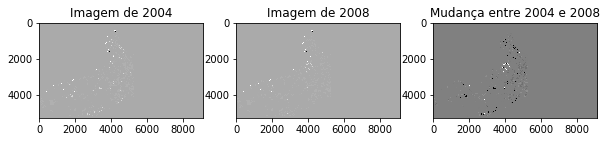

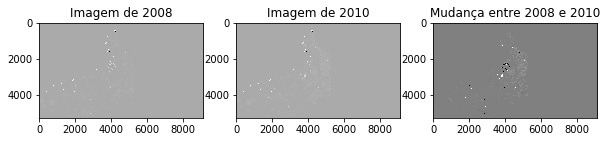

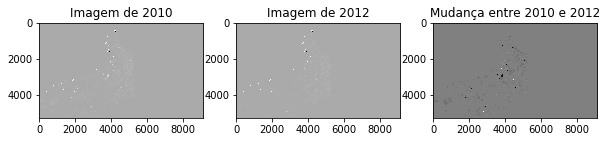

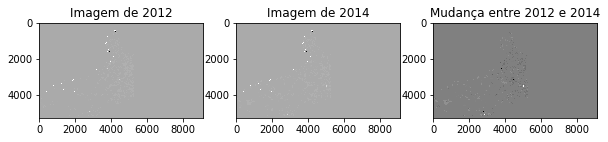

In [132]:
# Imagens

import matplotlib.pyplot as plt

# Relacionada ao ano de 2004
plt.figure(figsize=(10,5))

plt.subplot(131)
plt.title('Imagem de 2004')
plt.imshow(imagem2004,cmap='gray')

plt.subplot(132)
plt.title('Imagem de 2008')
plt.imshow(imagem2008,cmap='gray')

plt.subplot(133)
plt.title('Mudança entre 2004 e 2008')
plt.imshow(m04_08,cmap='gray')


# Relacionada ao ano de 2008

plt.figure(figsize=(10,5))

plt.subplot(131)
plt.title('Imagem de 2008')
plt.imshow(imagem2008,cmap='gray')

plt.subplot(132)
plt.title('Imagem de 2010')
plt.imshow(imagem2010,cmap='gray')

plt.subplot(133)
plt.title('Mudança entre 2008 e 2010')
plt.imshow(m08_10,cmap='gray')


# Relacionada ao ano de 2010

plt.figure(figsize=(10,5))

plt.subplot(131)
plt.title('Imagem de 2010')
plt.imshow(imagem2010,cmap='gray')

plt.subplot(132)
plt.title('Imagem de 2012')
plt.imshow(imagem2012,cmap='gray')

plt.subplot(133)
plt.title('Mudança entre 2010 e 2012')
plt.imshow(m10_12,cmap='gray')


# Relacionada ao ano de 2012

plt.figure(figsize=(10,5))

plt.subplot(131)
plt.title('Imagem de 2012')
plt.imshow(imagem2012,cmap='gray')

plt.subplot(132)
plt.title('Imagem de 2014')
plt.imshow(imagem2014,cmap='gray')

plt.subplot(133)
plt.title('Mudança entre 2012 e 2014')
plt.imshow(m12_14,cmap='gray')


# SANKEY_TODOS

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ['Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
               'Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
               'Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
               ' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',
               'Agricultura Anual','Área Não Observada', 'Área Urbana','Floresta','Mosaico de Ocupações','Pasto Limpo','Pasto Sujo','Reflorestamento','Regeneração com Pasto','Mineração', 'Vegetação Secundária','Outros','Pasto com Solo Exposto','Desflorestamento','Hidrografia','Não Floresta',
  
            ],
      color = ["orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink",
              "orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink",
              "orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink",
              "orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink","orange", "gray", "pink", "green", "salmon", "wheat","olive", "lightblue", "brown", "violet", "springgreen", "white","yellow", "red", "blue", "pink"]
    ),
    link = dict(
      source = source_todos,
      target = target_todos,
      value = value_todos
  ))

layout =  dict(
    title = "Diagrama Sankey para os anos de 2004, 2008, 2010, 2012, 2014",
    font = dict(
      size = 12
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)
plt.savefig('Sankey_todos.jpg')